<!--
author: Simon Buschmann
title: Presentation Basics
-->

# Presentation Basics
Simon Buschmann - 2025

## Real and p-adic expansions involving symmetric patterns
**Boris Adamczewski & Yann Bugeaud (2005)**

---

## Motivation

- **Frage (Mahler–Mendès France Problem):**
  Können algebraische Zahlen in verschiedenen Basisentwicklungen vorkommen?

- Beispiel: Für eine 0/1-Folge $(a=(a_k))$:
  $
  \sum_{k=1}^{\infty} \frac{a_k}{2^k}, \quad \sum_{k=1}^{\infty} \frac{a_k}{3^k}
  $
  Algebraisch **nur dann**, wenn rational.

- **p-adisches Analog (Problem 1):**
  $
  \alpha = \sum_{k=1}^{\infty} \frac{a_k}{p^k}, \quad \alpha_p = \sum_{k=1}^{\infty} a_k p^k
  $
  Vermutung: beide algebraisch ⇔ beide rational.

---

## Herausforderung

- Sehr wenig bekannt über b-adische/p-adische Entwicklungen irrationaler algebraischer Zahlen.
- Erwartung: Expansionen sind „chaotisch“ oder „normal“.
- Problem: Wie kann man überhaupt Transzendenz beweisen?

---

## Ansatz des Papers

- Einführung einer speziellen Klasse von Folgen: **palindromische Sequenzen**
- Definition: Es treten immer wieder **symmetrische Muster** (von der Form $U_n V_n U_n$) am Anfang auf.
- Viele klassische Folgen sind palindromisch (z. B. Thue–Morse, Sturmian, Paperfolding).

---

## Hauptresultat (Theorem 1)

**Satz:**
Sei $(a=(a_k))$ eine palindromische Folge.
Dann gilt für
$
\alpha = \sum_{k=1}^\infty \frac{a_k}{p^k},
\quad
\alpha_p = \sum_{k=1}^\infty a_k p^k
$
- Beide algebraisch **nur dann**, wenn rational.
- Sonst ist mindestens eine transzendental.

---

## Illustration in Python
```python
# Beispiel: Erzeuge eine einfache palindromische Sequenz
def palindromic_sequence(n_terms=30):
    seq = [0, 1]  # Start
    while len(seq) < n_terms:
        seq += seq[::-1]  # Spiegle die bisherige Folge an
    return seq[:n_terms]

seq = palindromic_sequence(40)
print("Folge:", seq)

# Approximiere α für p=2
p = 2
alpha = sum(seq[k]/(p**(k+1)) for k in range(len(seq)))
alpha_p = sum(seq[k]*(p**(k+1)) for k in range(len(seq)))

print("α ≈", alpha)
print("α_p ≈", alpha_p)


In [92]:
# Beispiel: Erzeuge eine einfache palindromische Sequenz
def palindromic_sequence(n_terms=30):
    seq = [0, 1]  # Start
    while len(seq) < n_terms:
        seq += seq[::-1]  # Spiegle die bisherige Folge an
    return seq[:n_terms]

seq = palindromic_sequence(50)
print("Folge:", seq)

# Approximiere α für p=2
p = 2
alpha = sum(seq[k]/(p**(k+1)) for k in range(len(seq)))
alpha_p = sum(seq[k]*(p**(k+1)) for k in range(len(seq)))

print("α ≈", alpha)
print("α_p ≈", alpha_p)

Folge: [0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1]
α ≈ 0.39999999999999947
α_p ≈ 1351079888211148


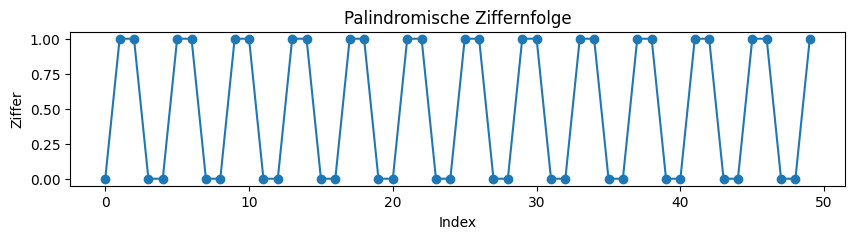

In [93]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,2))
plt.plot(seq, marker="o")
plt.title("Palindromische Ziffernfolge")
plt.xlabel("Index")
plt.ylabel("Ziffer")
plt.show()


In [94]:
# load manim - for 3blue1brown styled animations
from manim import *

config.media_width = "100%"
config.pixel_width = 400
config.pixel_height = 400

config.verbosity = "CRITICAL"

# toggle warnings to omit them from slides
import warnings
warnings.filterwarnings('ignore')

# load python packages
import numpy as np

In [95]:
%%manim -v WARNING --disable_caching --progress_bar None -qm PalindromeAnimation

from manim import *

class PalindromeAnimation(Scene):
    def construct(self):
        seq = "0110"
        text = Text(seq, font_size=72)
        self.play(Write(text))
        self.wait(1)
        # Markiere Spiegelung
        brace1 = Brace(text[0:2], DOWN)
        brace2 = Brace(text[2:4], DOWN)
        self.play(Create(brace1), Create(brace2))
        self.wait(2)


Manim Community v0.19.0

<div class="alert alert-block alert-info">
<b>Tip:</b> These Notes are best read without code blocks. Run next cell and press button, to hide all code cells.
</div>

In [96]:
# hide input cells
# copied from https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer#answer-28073228
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the code cells. (just working in jupyter notebook, not jupyterlab)"></form>''')

In [97]:
%%manim -v WARNING --disable_caching --progress_bar None -qm CreateCircle

from manim import config as global_config
config = global_config.copy()
myTemplate = TexTemplate()
myTemplate.add_to_preamble(r"\usepackage{mathrsfs}")
myTemplate.add_to_preamble(r"\usepackage[sfmath,lighttext]{kpfonts}")
myTemplate.add_to_preamble(r"\usepackage{amsmath,MnSymbol,wasysym}")  
config["tex_template"] = myTemplate
config.tex_template=myTemplate

from manim import *

class CreateCircle(Scene):
    def construct(self):
        circle = Circle()  # create a circle
        circle.set_fill(RED, opacity=0.5)  # set the color and transparency
        self.play(Create(circle))  # show the circle on screen


Manim Community v0.19.0

# Transzendentale Zahlen

## Was sind eigentlich Transzendentale Zahlen?

Neben den klassischen Zahlenmengen $\mathbb{N}$ oder $\mathbb{R}$, die man kennt, gibt auch die transzendentalen Zahlen $\mathbb{T}$.

In [ ]:
%%manim -v WARNING --disable_caching --progress_bar None -qm CreateNumbers

from manim import *

from manim import config as global_config
config = global_config.copy()
myTemplate = TexTemplate()
myTemplate.add_to_preamble(r"\usepackage{mathrsfs}")
myTemplate.add_to_preamble(r"\usepackage[sfmath,lighttext]{kpfonts}")
myTemplate.add_to_preamble(r"\usepackage{amsmath,MnSymbol,wasysym}")
config["tex_template"] = myTemplate
config.tex_template=myTemplate

class CreateNumbers(Scene):
    def construct(self):
        circleN = Circle(radius=1.0, color=WHITE, fill_opacity=0.2)   # create a circle
        textN = MathTex("\mathbb{N}", font_size=48)
        self.play(Create(circleN), Write(textN))                      # show the circle on screen

        circleZ = Circle(radius=1.5, color=WHITE, fill_opacity=0.2)   # create a circle
        circleZ.align_to(circleN, LEFT)
        textZ = MathTex("\mathbb{Z}", font_size=48)
        textZ.align_to(circleZ, RIGHT)
        textZ.shift(0.5*LEFT)
        self.play(Create(circleZ), Write(textZ))                                    # show the circle on screen

        circleQ = Circle(radius=2.0, color=WHITE, fill_opacity=0.2)   # create a circle
        circleQ.align_to(circleN, LEFT)
        textQ = MathTex("\mathbb{Q}", font_size=48)
        textQ.align_to(circleQ, RIGHT)
        textQ.shift(0.5*LEFT)
        self.play(Create(circleQ), Write(textQ))                                    # show the circle on screen

        circleR = Circle(radius=2.5, color=WHITE, fill_opacity=0.2)   # create a circle
        circleR.align_to(circleN, LEFT)
        textR = MathTex("\mathbb{R}", font_size=48)
        textR.align_to(circleR, RIGHT)
        textR.shift(0.5*LEFT)
        self.play(Create(circleR), Write(textR))                                    # show the circle on screen

        self.wait(3)

        frage = Text("Wo sind die \n transzendenten Zahlen?")
        frage.shift(2*LEFT)
        self.play(Write(frage))

Manim Community v0.19.0